In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
import statsmodels.stats.api as stm
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')

# Общая информация

In [2]:
estimatyion_df = pd.read_csv('megafon.csv')
#estimatyion_df.drop('user_id', axis=1, inplace=True)
estimatyion_df

user_id  Q1          Q2  Total Traffic(MB)  Downlink Throughput(Kbps)  \
0           1   5         NaN          775.48846                     360.13   
1           2   5           4          861.96324                    3023.54   
2           3   1           4          261.11860                     790.96   
3           4   8           3          179.18564                    2590.97   
4           5   2     2, 3, 4          351.99208                     731.61   
...       ...  ..         ...                ...                        ...   
3107     3108   3     1, 4, 5          519.96475                    1045.70   
3108     3109   3  1, 3, 4, 5          171.52629                     670.32   
3109     3110  10         NaN          187.44936                     590.29   
3110     3111   6        1, 3          827.74515                    1841.90   
3111     3112   6         NaN          596.22757                    2196.00   

      Uplink Throughput(Kbps)  Downlink TCP Retransmission Rate(%)  \
0                       86.56                                 3.93   
1                      411.18                                 1.27   
2                       34.20                                 1.79   
3                      325.88                                 0.80   
4                      223.54                                 1.15   
...                       ...                                  ...   
3107                    44.61                                 0.47   
3108                    40.94                                 2.35   
3109                   186.36                                 2.06   
3110                   373.53                                 1.21   
3111                   265.87                                 0.41   

      Video Streaming Download Throughput(Kbps)  \
0                                       1859.15   
1                                        667.47   
2                                       1079.60   
3                                       7053.81   
4                                       4550.38   
...                                         ...   
3107                                    4523.66   
3108                                    1711.54   
3109                                    3182.83   
3110                                    5675.93   
3111                                    9295.59   

      Video Streaming xKB Start Delay(ms)  Web Page Download Throughput(Kbps)  \
0                                    2309                             1007.82   
1                                    2080                              255.36   
2                                    6367                              535.85   
3                                    3218                             1221.02   
4                                    1767                             2336.56   
...                                   ...                                 ...   
3107                                 1468                             1044.66   
3108                                 2780                              954.91   
3109                                 2195                             1094.62   
3110                                 1905                             2361.88   
3111                                 2036                             5009.29   

      Web Average TCP RTT(ms)  
0                          83  
1                         425  
2                         485  
3                          51  
4                          68  
...                       ...  
3107                      304  
3108                      251  
3109                      109  
3110                      202  
3111                      156  

[3112 rows x 11 columns]

In [3]:
estimatyion_df.dtypes

user_id                                        int64
Q1                                            object
Q2                                            object
Total Traffic(MB)                            float64
Downlink Throughput(Kbps)                    float64
Uplink Throughput(Kbps)                      float64
Downlink TCP Retransmission Rate(%)          float64
Video Streaming Download Throughput(Kbps)    float64
Video Streaming xKB Start Delay(ms)            int64
Web Page Download Throughput(Kbps)           float64
Web Average TCP RTT(ms)                        int64
dtype: object

In [4]:
marks = [str(mark) for mark in range(0, 11)]

In [5]:
estimatyion_df.describe()

user_id  Total Traffic(MB)  Downlink Throughput(Kbps)  \
count  3112.000000        3112.000000                3112.000000   
mean   1556.500000         406.282339                2220.774023   
std     898.501345         220.593815                2629.824405   
min       1.000000         100.026680                  13.260000   
25%     778.750000         214.261192                 652.297500   
50%    1556.500000         363.999720                1404.230000   
75%    2334.250000         572.524325                2823.645000   
max    3112.000000         887.078270               39817.640000   

       Uplink Throughput(Kbps)  Downlink TCP Retransmission Rate(%)  \
count              3112.000000                          3112.000000   
mean                170.702381                             1.834518   
std                 204.031286                             2.074593   
min                   6.110000                             0.050000   
25%                  70.735000                             0.720000   
50%                 119.435000                             1.300000   
75%                 210.617500                             2.240000   
max                4141.850000                            31.200000   

       Video Streaming Download Throughput(Kbps)  \
count                                3112.000000   
mean                                 5728.806848   
std                                  5161.475235   
min                                     0.000000   
25%                                  2324.550000   
50%                                  4436.500000   
75%                                  7611.440000   
max                                 58566.030000   

       Video Streaming xKB Start Delay(ms)  \
count                          3112.000000   
mean                           2107.596080   
std                            1582.423057   
min                             239.000000   
25%                            1280.000000   
50%                            1672.000000   
75%                            2312.000000   
max                           21392.000000   

       Web Page Download Throughput(Kbps)  Web Average TCP RTT(ms)  
count                         3112.000000              3112.000000  
mean                          2100.258901               194.195051  
std                           2062.509549               267.387914  
min                              0.000000                 0.000000  
25%                           1018.002500                74.000000  
50%                           1670.695000               118.000000  
75%                           2519.987500               207.000000  
max                          35603.970000              3471.000000

# Корректность ответов

In [6]:
estimatyion_df['Q1'].value_counts()

10                                                                      846
1                                                                       532
3                                                                       325
8                                                                       291
9                                                                       238
5                                                                       234
7                                                                       200
2                                                                       168
4                                                                       123
6                                                                       101
0                                                                        10
1, 3                                                                      2
5, 6                                                                      2
Нет         

In [7]:
estimatyion_df['Q1'][estimatyion_df['Q1'] == '0'] = '1'
estimatyion_df = estimatyion_df[estimatyion_df['Q1'].isin(marks)]
estimatyion_df['Q1'] = estimatyion_df['Q1'].astype(int)
estimatyion_df['Q1'].value_counts()

10    846
1     542
3     325
8     291
9     238
5     234
7     200
2     168
4     123
6     101
Name: Q1, dtype: int64

In [8]:
print(estimatyion_df[estimatyion_df['Q1'] < 9]['Q2'].isna().sum())
estimatyion_df[(estimatyion_df['Q1'] < 9) & (estimatyion_df['Q2'].isna() == True)]

669


user_id  Q1   Q2  Total Traffic(MB)  Downlink Throughput(Kbps)  \
0           1   5  NaN          775.48846                     360.13   
5           6   3  NaN          416.67461                    1346.89   
11         12   1  NaN          730.53759                    4020.94   
12         13   1  NaN          828.47641                    2171.11   
16         17   3  NaN          401.82326                     151.41   
...       ...  ..  ...                ...                        ...   
3084     3085   1  NaN          563.54476                    1154.29   
3086     3087   2  NaN          199.24502                     757.94   
3088     3089   1  NaN          406.17290                     421.96   
3106     3107   1  NaN          490.50187                    1992.68   
3111     3112   6  NaN          596.22757                    2196.00   

      Uplink Throughput(Kbps)  Downlink TCP Retransmission Rate(%)  \
0                       86.56                                 3.93   
5                      175.53                                 1.08   
11                     569.49                                 1.57   
12                      46.16                                 8.49   
16                      34.70                                 2.55   
...                       ...                                  ...   
3084                    52.04                                 0.59   
3086                   173.63                                 1.83   
3088                    98.46                                 1.99   
3106                    85.73                                 0.87   
3111                   265.87                                 0.41   

      Video Streaming Download Throughput(Kbps)  \
0                                       1859.15   
5                                       4553.01   
11                                      8747.53   
12                                      2483.79   
16                                       675.88   
...                                         ...   
3084                                    6691.67   
3086                                   11859.47   
3088                                    4724.27   
3106                                    3477.94   
3111                                    9295.59   

      Video Streaming xKB Start Delay(ms)  Web Page Download Throughput(Kbps)  \
0                                    2309                             1007.82   
5                                    2136                             1587.58   
11                                   1556                             1347.73   
12                                   2504                             1923.60   
16                                   6550                              341.83   
...                                   ...                                 ...   
3084                                 1479                             1551.31   
3086                                 1922                             1285.43   
3088                                 1232                             4685.48   
3106                                 2004                             2369.41   
3111                                 2036                             5009.29   

      Web Average TCP RTT(ms)  
0                          83  
5                         551  
11                         77  
12                        112  
16                        827  
...                       ...  
3084                      112  
3086                       86  
3088                      102  
3106                      245  
3111                      156  

[669 rows x 11 columns]

# Распределение оценок

In [9]:
q1_marks = estimatyion_df['Q1'].value_counts()
q1_marks.sort_index(inplace=True)
fig = px.bar(y=q1_marks.values, x=q1_marks.index)
fig.update_xaxes(tickvals = np.array(range(1, 11)))
fig.show()

In [10]:
answers_counts = estimatyion_df.dropna().groupby('Q2').agg(pd.Series.count)['Q1']
print(answers_counts.sort_values(ascending=False)[:10])
px.bar(x = answers_counts.index, y=answers_counts.values)

Q2
3          190
4          170
1          168
1, 3       121
3, 4        85
1, 3, 4     76
7           64
1, 4        56
3, 4, 5     45
1, 2, 3     44
Name: Q1, dtype: int64


In [11]:
q2_answers = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0}
new_answers = []
for answer in estimatyion_df[estimatyion_df['Q2'].isna() == False]['Q2']:
    answer = answer.replace(',', '')
    answ_cors = [int(num) for num in answer.split(' ')]
    new_answers.append(answ_cors)
estimatyion_df['Q2'][estimatyion_df['Q2'].isna() == False] = new_answers

In [12]:
q2_answers = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0}
for answer in estimatyion_df[estimatyion_df['Q2'].isna() == False]['Q2']:
    for mark in answer:
        if mark in q2_answers.keys():
            q2_answers[mark] += 1
print(list(q2_answers.keys()), list(q2_answers.values()))

[1, 2, 3, 4, 5, 6, 7] [647, 184, 705, 625, 222, 13, 86]


In [13]:
px.bar(x = list(q2_answers.keys()), y=list(q2_answers.values()))

# Разница характеристик, для удовлетворенных и неудовлетворенных пользователей

In [14]:
estimatyion_df['satys'] = 0
estimatyion_df['satys'][estimatyion_df['Q1'] >= 9] = 1
tech_char = estimatyion_df.columns[3:11]

In [15]:
fig = go.Figure()
fig.add_trace(go.Bar(y=estimatyion_df[tech_char][estimatyion_df['satys'] == 1].mean(), x=tech_char, name='Marks 9-10'))
fig.add_trace(go.Bar(y=estimatyion_df[tech_char][estimatyion_df['satys'] == 0].mean(), x=tech_char, name='Marks less 9'))
fig.show()

# Корреляция оценок с техническими характеристиками

<AxesSubplot:>

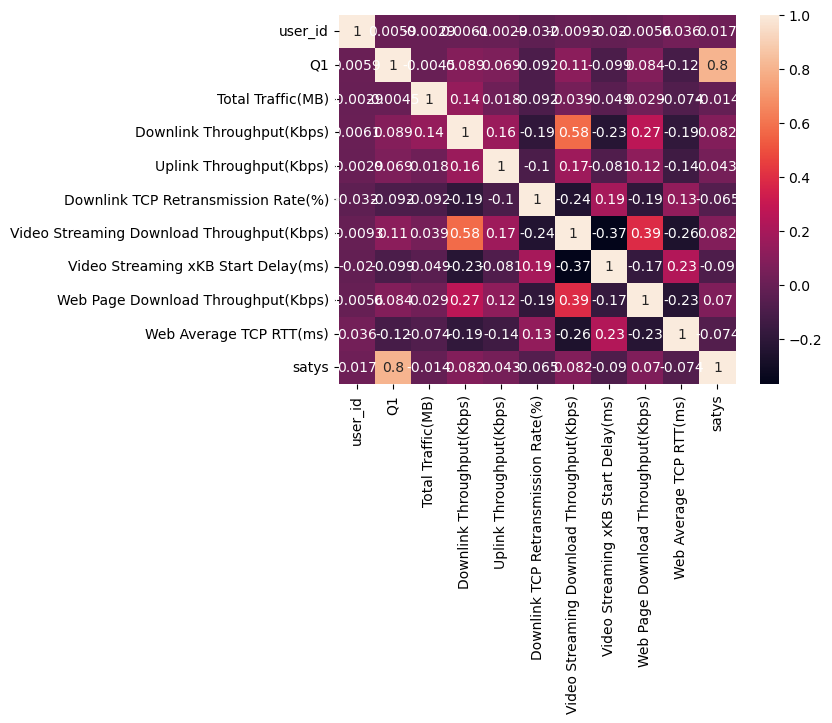

In [16]:
sns.heatmap(estimatyion_df.drop('Q2', axis=1).corr(), annot=True)

# Проверка характеристик с помощью АВ тестирования.

## Влияния характеристик на Q1

In [17]:
def bootstrap(arr,N_TRIAL=3000,func=np.mean):
    res = []
    n = len(arr)
    # Инициализируем цикл попыток
    for _ in range(N_TRIAL):
        # Делаем подвыборку размера n
        if len(arr.shape)>1:
            ind=np.random.choice(np.arange(arr.shape[0]), size=(n,))
            subsample=arr.iloc[ind]
        else:
            subsample=np.random.choice(arr, size=(n,))
        # рассчитываем статистику
        stat=func(subsample)
        res.append(stat)
    return res # shape (N_TRIAL,)

In [18]:
def count_pvalue(char_name, first_group, second_group, alpha=0.95):
    data = np.random.randint(10, 30, 1000)
    boot1 = bootstrap(first_group[char_name])
    boot2 = bootstrap(second_group[char_name])
    std1 = np.std(boot1)
    std2 = np.std(boot2)
    inter1 = st.norm.interval(alpha=0.95, loc=np.mean(boot1), scale=std1)
    inter2 = st.norm.interval(alpha=0.95, loc=np.mean(boot2), scale=std2)
    print(inter1)
    print(inter2)
    buf=[]
    for i in range(100):#я сделал по аналогии с лекциями, но не понял почему нужно случайные выборки брать, а нельзя просто последовательно пройти
        a_sample = first_group[char_name].sample(len(first_group[char_name]), replace=True)
        b_sample = second_group[char_name].sample(len(second_group[char_name]), replace=True)
        buf.append(np.mean(b_sample)-np.mean(a_sample))
    draw_intervals2(boot1, boot2, inter1, inter2)
    fig, ax = plt.subplots()
    ax_buf = sns.distplot(buf, ax=ax)
    ax_buf.axvline(np.percentile(buf,2.5),linestyle='-',color='r')#почему именно такие перцинтили выбираются и для чего? я не нашел где про это говорится
    ax_buf.axvline(np.percentile(buf,97.5),linestyle='-',color='r')
    ax_buf.axvline(0,linestyle='-',color='black')
    return st.ttest_ind(first_group[char_name], second_group[char_name]), buf

In [19]:
def draw_intervals1(boot1, boot2, inter1, inter2):
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=boot1))
    fig.add_trace(go.Histogram(x=boot2))
    fig.add_vline(inter1[0], line_color='blue')
    fig.add_vline(inter1[1], line_color='blue')
    fig.add_vline(inter2[0], line_color='red')
    fig.add_vline(inter2[1], line_color='red')
    fig.show()
def draw_intervals2(boot1, boot2, inter1, inter2):
    ax = sns.distplot(boot1, label='Marks 9-10')
    sns.distplot(boot2,ax=ax, label='Marks less 9')
    ax.axvline(inter1[0],color='cornflowerblue')
    ax.axvline(inter1[1],color='cornflowerblue')
    ax.axvline(inter2[0],color='orange')
    ax.axvline(inter2[1],color='orange')
    ax.legend()

### Downlink Throughput(Kbps)

In [20]:
px.histogram(x=estimatyion_df['Downlink Throughput(Kbps)'])

(2341.5628427721786, 2671.401151016259)
(1941.6493289553077, 2167.9915865621656)
4.988924286820352e-06


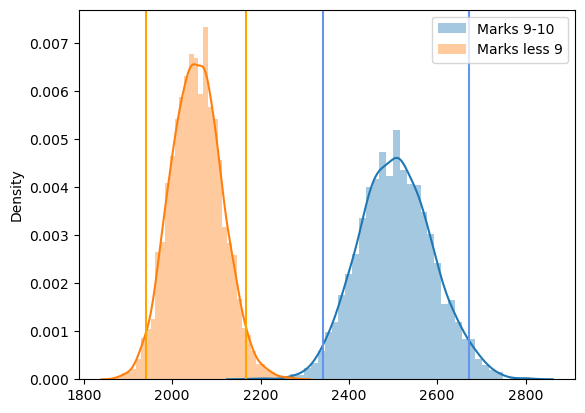

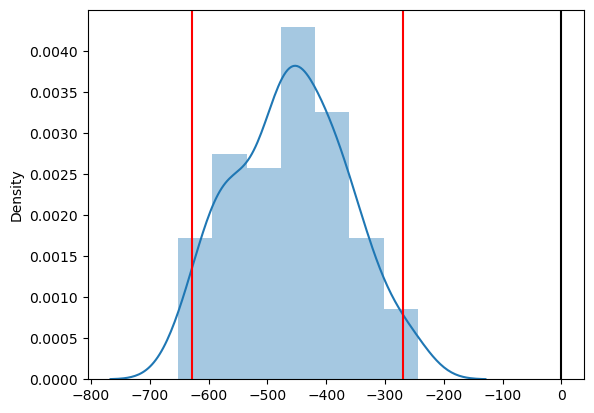

In [21]:
first_group = estimatyion_df[estimatyion_df['satys'] == 1]#для пользователей оценивших на 9-10
second_group = estimatyion_df[estimatyion_df['satys'] == 0]#для пользователей оценивших на less 9
ttest_r, buf = count_pvalue('Downlink Throughput(Kbps)', first_group, second_group)
print(ttest_r[1])

### Video Streaming Download Throughput(Kbps)

In [22]:
px.histogram(x=estimatyion_df['Video Streaming Download Throughput(Kbps)'])

(5987.066055577531, 6620.888824164164)
(5200.730087251336, 5641.05286911291)
5.476186555429757e-06


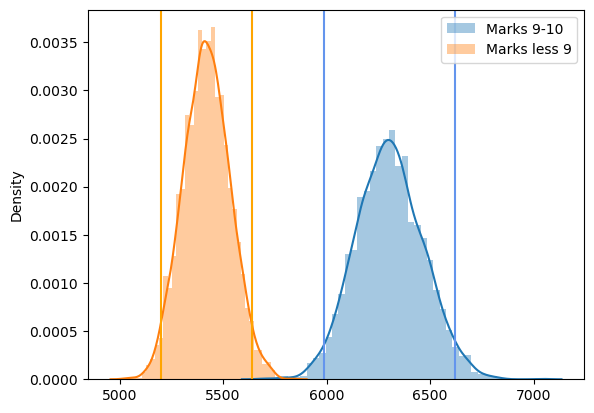

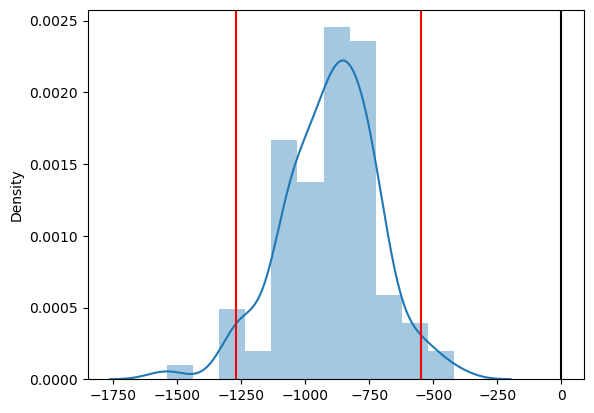

In [23]:
ttest_r, buf = count_pvalue('Video Streaming Download Throughput(Kbps)', first_group, second_group)
print(ttest_r[1])

### Video Streaming xKB Start Delay(ms)


In [24]:
px.histogram(x=estimatyion_df['Video Streaming xKB Start Delay(ms)'])

(1837.966091998075, 2002.7463440412855)
(2142.6223076907677, 2291.4025085054686)
6.855270594626428e-07


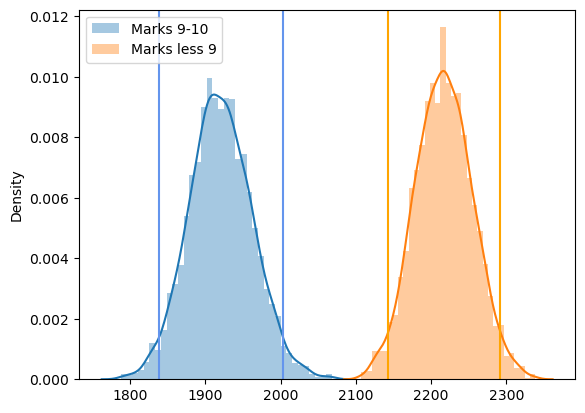

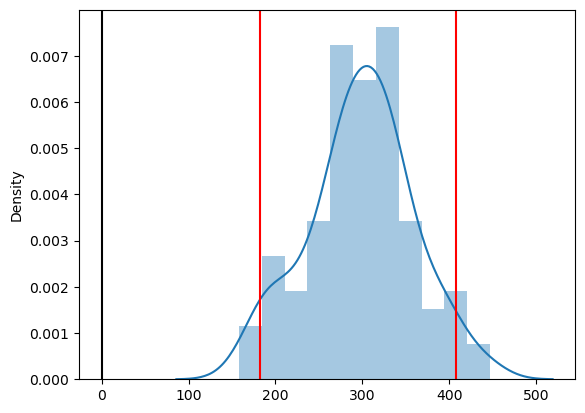

In [25]:
ttest_r, buf = count_pvalue('Video Streaming xKB Start Delay(ms)', first_group, second_group)
print(ttest_r[1])

### Web Page Download Throughput(Kbps)

In [26]:
px.histogram(x=estimatyion_df['Web Page Download Throughput(Kbps)'])

(2171.6263697028203, 2407.2328698051747)
(1898.7115899712683, 2078.7966785031936)
9.450939546220241e-05


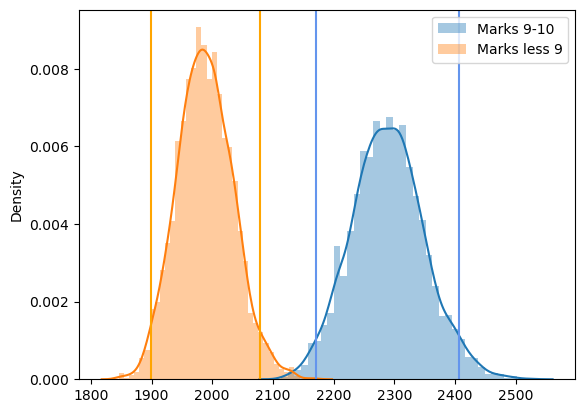

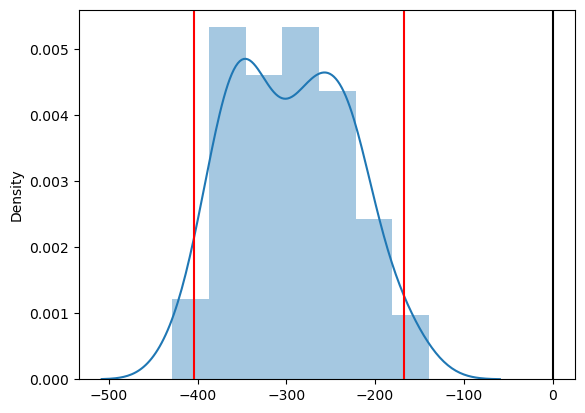

In [27]:
ttest_r, buf = count_pvalue('Web Page Download Throughput(Kbps)', first_group, second_group)
print(ttest_r[1])

### Web Average TCP RTT(ms)

In [28]:
px.histogram(x=estimatyion_df['Web Average TCP RTT(ms)'])

(154.0817122237275, 180.82444952289)
(196.00261945687754, 221.68461542215476)
4.247214572476763e-05


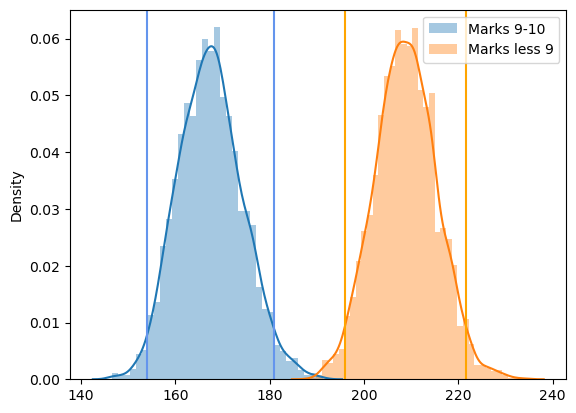

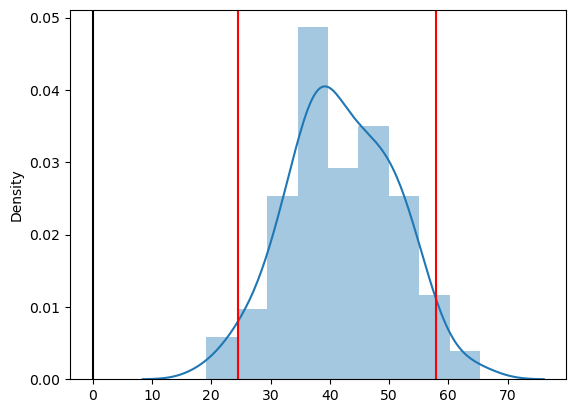

In [29]:
ttest_r, buf = count_pvalue('Web Average TCP RTT(ms)', first_group, second_group)
print(ttest_r[1])

## Проверка характеристик на ответ Q2

In [30]:
estimatyion_df['1 claim'] = 0
estimatyion_df['3 claim'] = 0
estimatyion_df['4 claim'] = 0
df_id = 0
for i in estimatyion_df['user_id']:
    marks = list(estimatyion_df[estimatyion_df['user_id'] == i]['Q2'])[0]
    if marks is not np.nan:
        if 4 in marks:
            estimatyion_df['4 claim'][estimatyion_df['user_id'] == i] = 1
        if 1 in marks:
            estimatyion_df['1 claim'][estimatyion_df['user_id'] == i] = 1
        if 3 in marks:
            estimatyion_df['3 claim'][estimatyion_df['user_id'] == i] = 1
estimatyion_df

user_id  Q1            Q2  Total Traffic(MB)  Downlink Throughput(Kbps)  \
0           1   5           NaN          775.48846                     360.13   
1           2   5           [4]          861.96324                    3023.54   
2           3   1           [4]          261.11860                     790.96   
3           4   8           [3]          179.18564                    2590.97   
4           5   2     [2, 3, 4]          351.99208                     731.61   
...       ...  ..           ...                ...                        ...   
3107     3108   3     [1, 4, 5]          519.96475                    1045.70   
3108     3109   3  [1, 3, 4, 5]          171.52629                     670.32   
3109     3110  10           NaN          187.44936                     590.29   
3110     3111   6        [1, 3]          827.74515                    1841.90   
3111     3112   6           NaN          596.22757                    2196.00   

      Uplink Throughput(Kbps)  Downlink TCP Retransmission Rate(%)  \
0                       86.56                                 3.93   
1                      411.18                                 1.27   
2                       34.20                                 1.79   
3                      325.88                                 0.80   
4                      223.54                                 1.15   
...                       ...                                  ...   
3107                    44.61                                 0.47   
3108                    40.94                                 2.35   
3109                   186.36                                 2.06   
3110                   373.53                                 1.21   
3111                   265.87                                 0.41   

      Video Streaming Download Throughput(Kbps)  \
0                                       1859.15   
1                                        667.47   
2                                       1079.60   
3                                       7053.81   
4                                       4550.38   
...                                         ...   
3107                                    4523.66   
3108                                    1711.54   
3109                                    3182.83   
3110                                    5675.93   
3111                                    9295.59   

      Video Streaming xKB Start Delay(ms)  Web Page Download Throughput(Kbps)  \
0                                    2309                             1007.82   
1                                    2080                              255.36   
2                                    6367                              535.85   
3                                    3218                             1221.02   
4                                    1767                             2336.56   
...                                   ...                                 ...   
3107                                 1468                             1044.66   
3108                                 2780                              954.91   
3109                                 2195                             1094.62   
3110                                 1905                             2361.88   
3111                                 2036                             5009.29   

      Web Average TCP RTT(ms)  satys  1 claim  3 claim  4 claim  
0                          83      0        0        0        0  
1                         425      0        0        0        1  
2                         485      0        0        0        1  
3                          51      0        0        1        0  
4                          68      0        0        1        1  
...                       ...    ...      ...      ...      ...  
3107                      304      0        1        0        1  
3108                      251      0        1        1        1  
3109        

<AxesSubplot:>

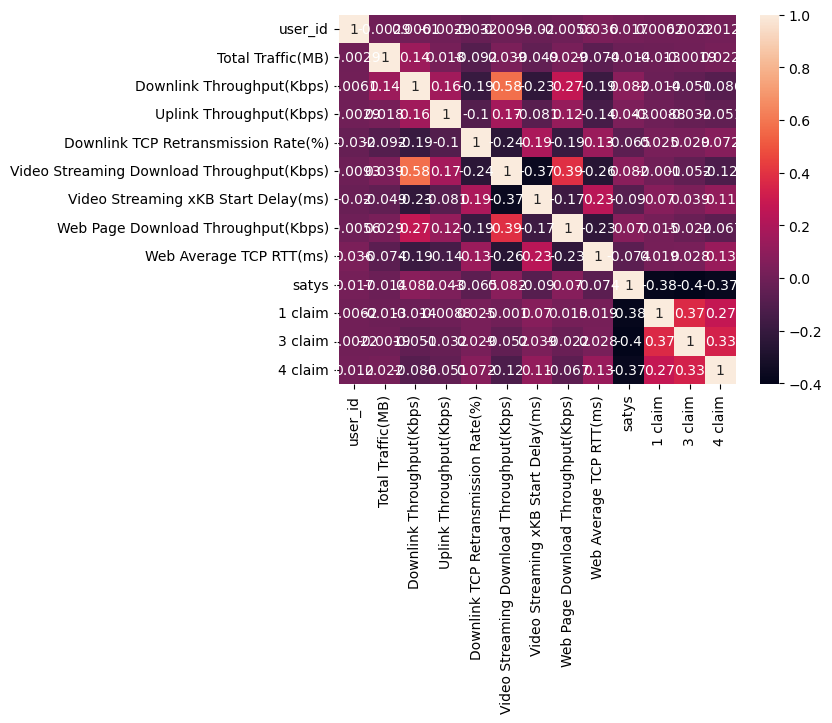

In [31]:
sns.heatmap(estimatyion_df.drop('Q1', axis=1).corr(), annot=True)

### 1.Недозвоны, обрывы при звонках

In [32]:
first_group = estimatyion_df[estimatyion_df['1 claim'] == 1]
second_group = estimatyion_df[estimatyion_df['1 claim'] == 0]

In [33]:
fig = go.Figure()
fig.add_trace(go.Bar(y=first_group[tech_char].mean(), x=tech_char, name='claim 1'))
fig.add_trace(go.Bar(y=second_group[tech_char].mean(), x=tech_char, name='no claim 1'))

In [34]:
print(first_group['Downlink TCP Retransmission Rate(%)'].mean(), second_group['Downlink TCP Retransmission Rate(%)'].mean())

1.9349922720247297 1.8074886410574156


### Downlink Throughput(Kbps) 

(1934.7363881046435, 2351.718188732039)
(2129.042831167773, 2336.7044526240493)
0.42370546246020857


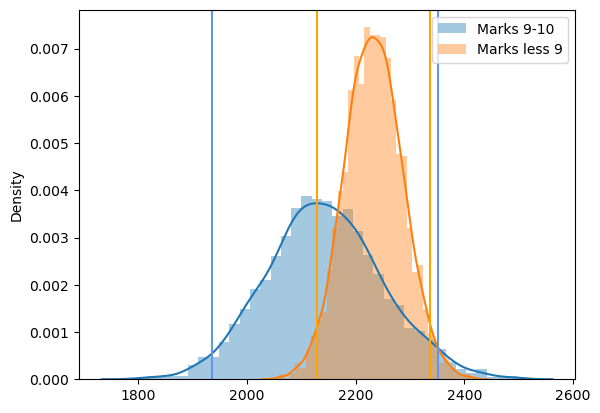

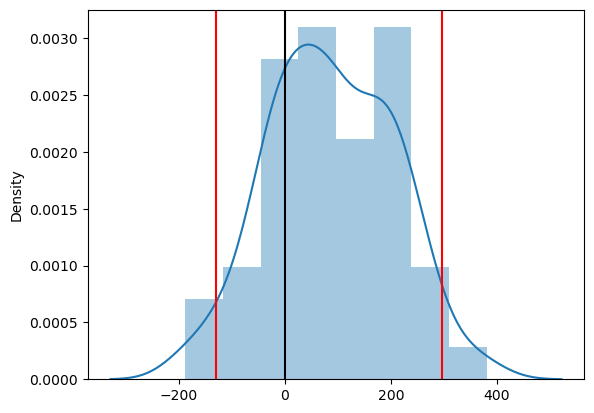

In [35]:
ttest_r, buf = count_pvalue('Downlink Throughput(Kbps)', first_group, second_group)
print(ttest_r[1])

### Uplink Throughput(Kbps)  

(155.3101862601964, 178.80100418802616)
(162.6550362773026, 180.2615949990295)
0.6251069912832867


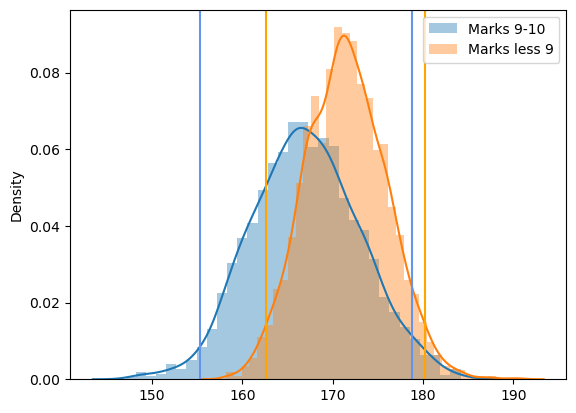

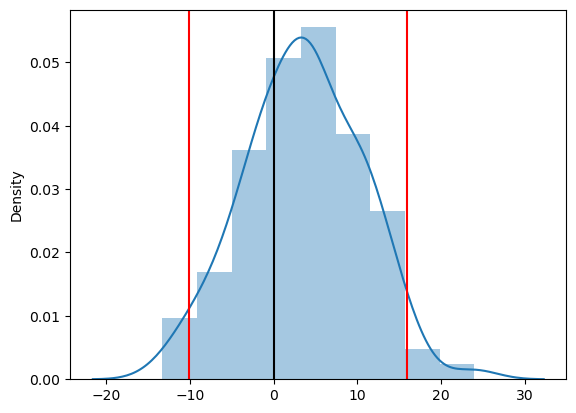

In [36]:
ttest_r, buf = count_pvalue('Uplink Throughput(Kbps)', first_group, second_group)
print(ttest_r[1])

### Downlink TCP Retransmission Rate(%)

(1.7700639615562923, 2.099032627830622)
(1.724781044093752, 1.890639035763057)
0.16287883170932915


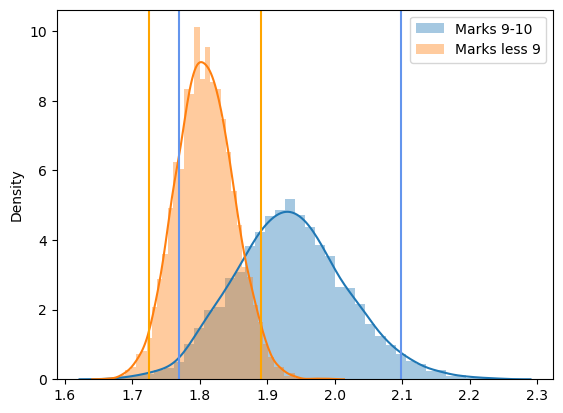

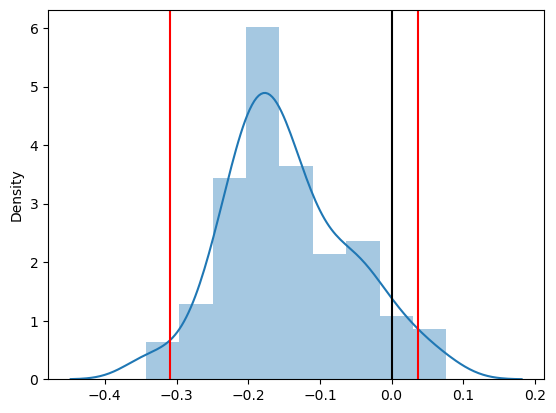

In [37]:
ttest_r, buf = count_pvalue('Downlink TCP Retransmission Rate(%)', first_group, second_group)
print(ttest_r[1])

## 3.Плохое качество связи в зданиях.

In [38]:
first_group = estimatyion_df[estimatyion_df['3 claim'] == 1]
second_group = estimatyion_df[estimatyion_df['3 claim'] == 0]

In [39]:
fig = go.Figure()
fig.add_trace(go.Bar(y=first_group[tech_char].mean(), x=tech_char, name='claim 3'))
fig.add_trace(go.Bar(y=second_group[tech_char].mean(), x=tech_char, name='no claim 3'))

In [40]:
print(first_group['Downlink TCP Retransmission Rate(%)'].mean(), second_group['Downlink TCP Retransmission Rate(%)'].mean())

1.9438156028368803 1.8017266187050354


(1.7957887968113435, 2.093634985694566)
(1.7185629307535002, 1.8855143185059162)
0.10875624106342305


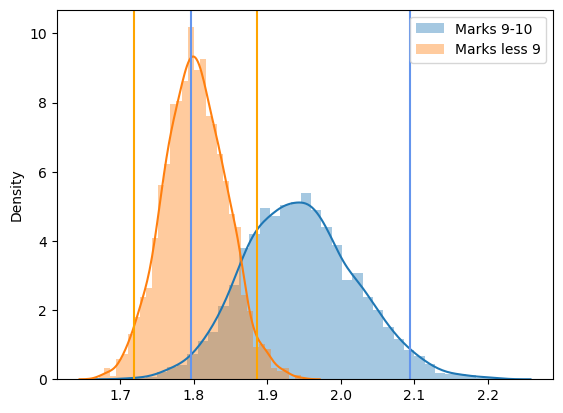

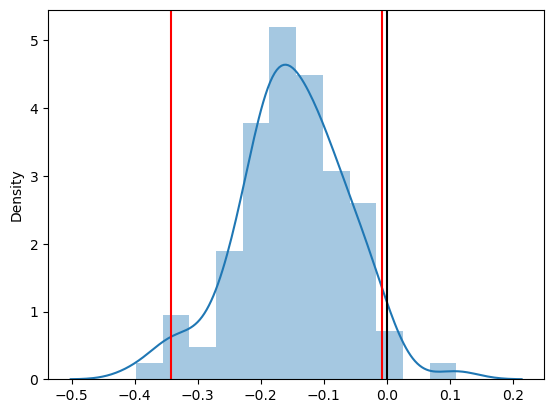

In [41]:
ttest_r, buf = count_pvalue('Downlink TCP Retransmission Rate(%)', first_group, second_group)
print(ttest_r[1])

### Uplink Throughput(Kbps)  

(144.5098095573339, 172.56564627245334)
(165.6786915711529, 182.19251136861294)
0.07492839569991386


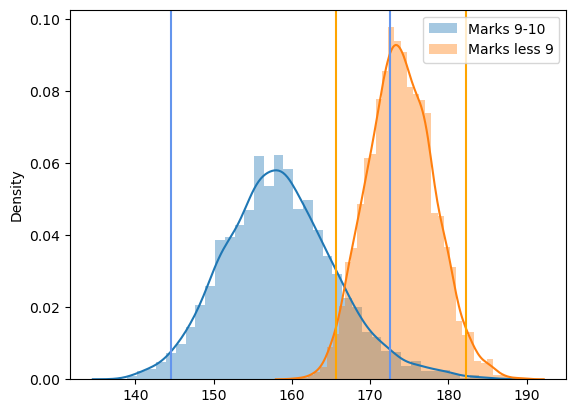

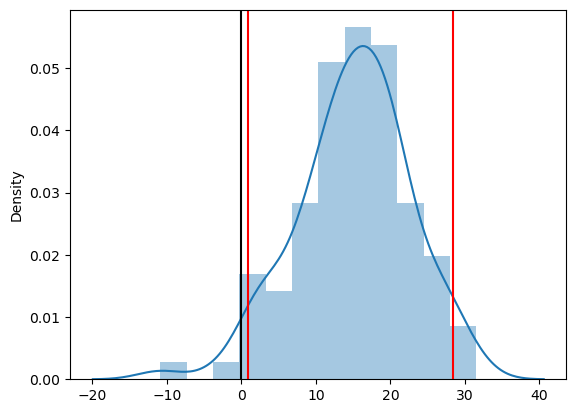

In [42]:
ttest_r, buf = count_pvalue('Uplink Throughput(Kbps)', first_group, second_group)
print(ttest_r[1])

### Downlink TCP Retransmission Rate(%)

(1.798803308991811, 2.0905366437268658)
(1.7164241751778642, 1.8868219808384992)
0.10875624106342305


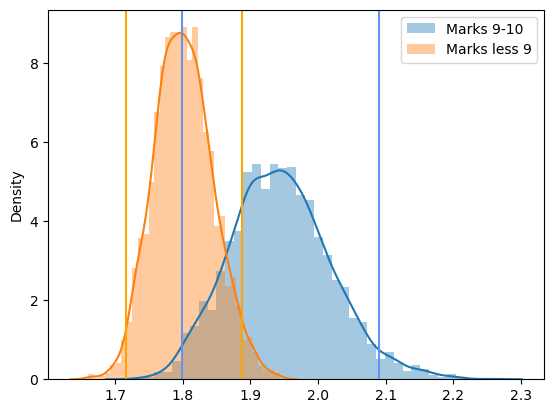

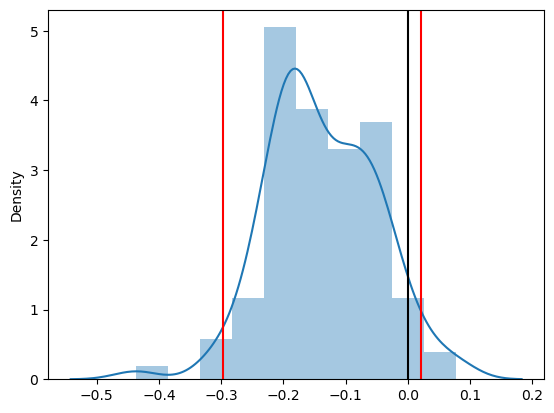

In [43]:
ttest_r, buf = count_pvalue('Downlink TCP Retransmission Rate(%)', first_group, second_group)
print(ttest_r[1])

# 4.Медленный мобильный интернет

In [44]:
first_group = estimatyion_df[estimatyion_df['4 claim'] == 1]
second_group = estimatyion_df[estimatyion_df['4 claim'] == 0]

In [45]:
fig = go.Figure()
fig.add_trace(go.Bar(y=first_group[tech_char].mean(), x=tech_char, name='claim 4'))
fig.add_trace(go.Bar(y=second_group[tech_char].mean(), x=tech_char, name='no claim 4'))

In [46]:
print(first_group['Downlink TCP Retransmission Rate(%)'].mean(), second_group['Downlink TCP Retransmission Rate(%)'].mean())

2.1270079999999996 1.759512893982808


### Downlink Throughput(Kbps)

(1611.5413090773627, 1932.3430985173036)
(2220.358859758337, 2436.52466560938)
1.8709940774411972e-06


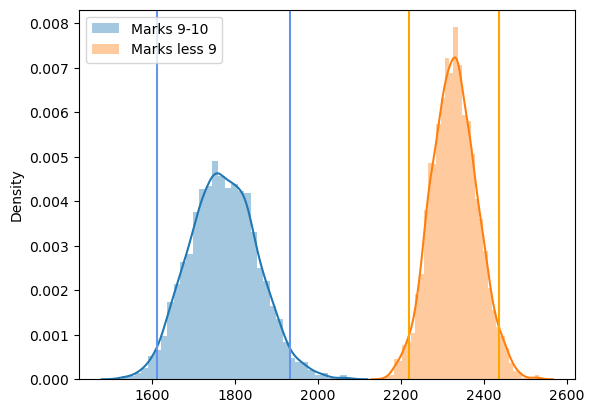

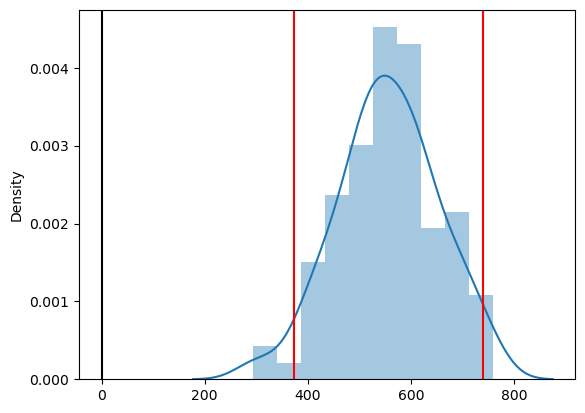

In [47]:
ttest_r, buf = count_pvalue('Downlink Throughput(Kbps)', first_group, second_group)
print(ttest_r[1])

### Uplink Throughput(Kbps)

(138.8829869861071, 160.92981601122622)
(167.0422228023038, 184.53227405947814)
0.004981874716759779


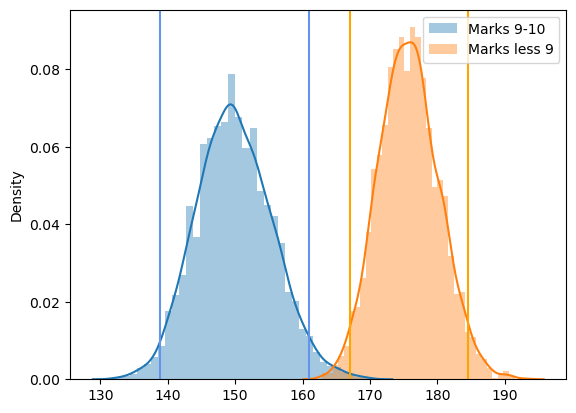

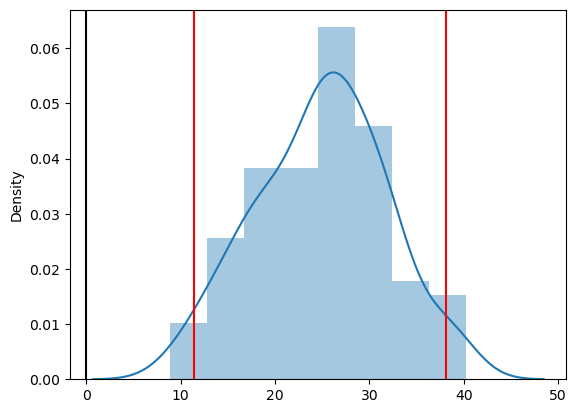

In [48]:
ttest_r, buf = count_pvalue('Uplink Throughput(Kbps)', first_group, second_group)
print(ttest_r[1])

### Downlink TCP Retransmission Rate(%)

(1.9564886154084458, 2.292247491258221)
(1.67956958426284, 1.8419211648161615)
7.024317784576852e-05


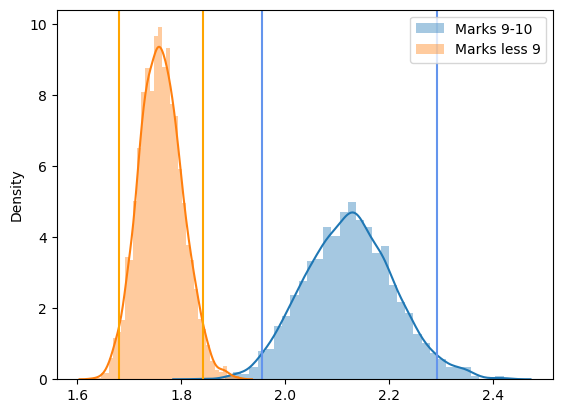

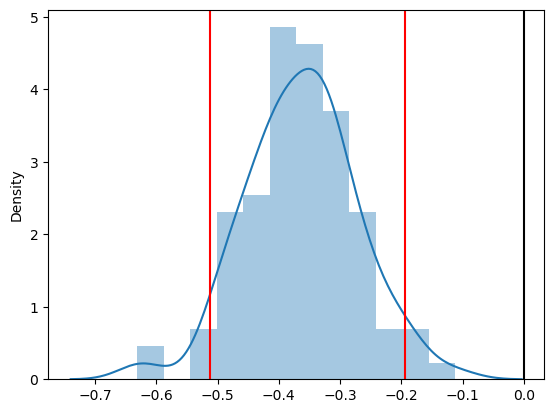

In [49]:
ttest_r, buf = count_pvalue('Downlink TCP Retransmission Rate(%)', first_group, second_group)
print(ttest_r[1])

### Web Page Download Throughput(Kbps)

(1646.5910809149716, 1999.1407910423616)
(2086.464316884017, 2242.8880066335155)
0.00019012985306325448


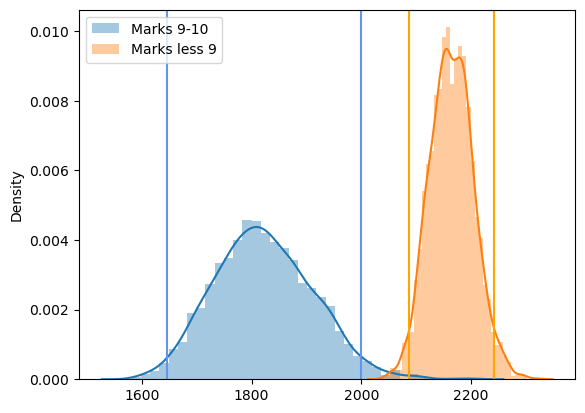

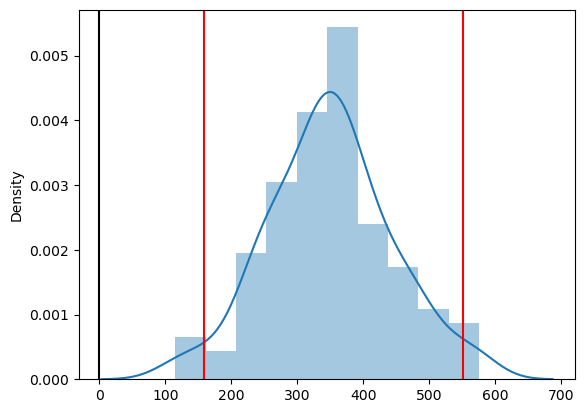

In [50]:
ttest_r, buf = count_pvalue('Web Page Download Throughput(Kbps)', first_group, second_group)
print(ttest_r[1])

### Web Average TCP RTT(ms)

(232.35489078709878, 293.65007027956784)
(167.90835259829245, 185.36200679589504)
6.45579779576067e-13


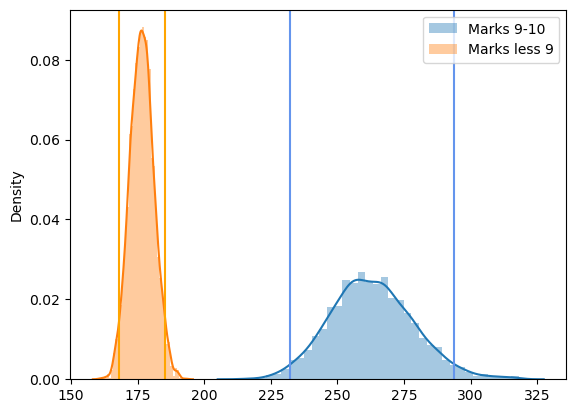

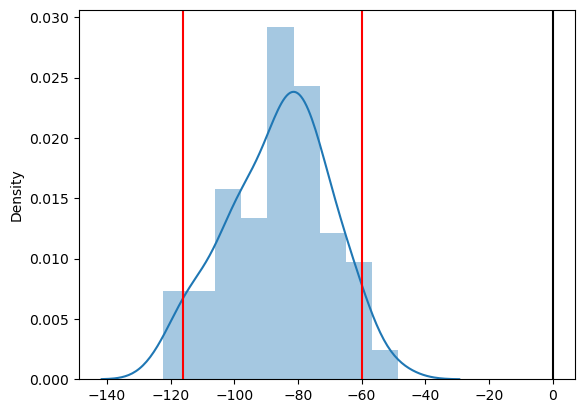

In [51]:
ttest_r, buf = count_pvalue('Web Average TCP RTT(ms)', first_group, second_group)
print(ttest_r[1])

# Выводы

## Q1

## Q2

### 1. Недозвоны, обрывы при звонках

### 3. Плохое качество связи в зданиях

### 4. Медленный мобильный интернет 